# 1. Import Data Set

In [1]:
import pandas as pd
data = pd.read_csv("NewspaperData.csv")
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


# 2. EDA step already done

# 3. Correlation

In [ ]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<AxesSubplot:xlabel='daily'>

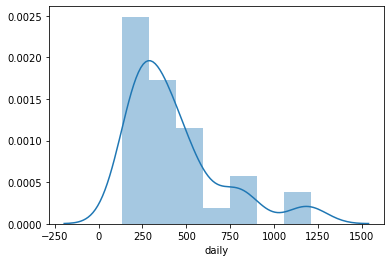

In [57]:
import seaborn as sns
sns.distplot(data['daily'])

C:\Users\sumit\AppData\Local\Temp\ipykernel_5472\3800732917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sunday'])


<Axes: xlabel='sunday', ylabel='Density'>

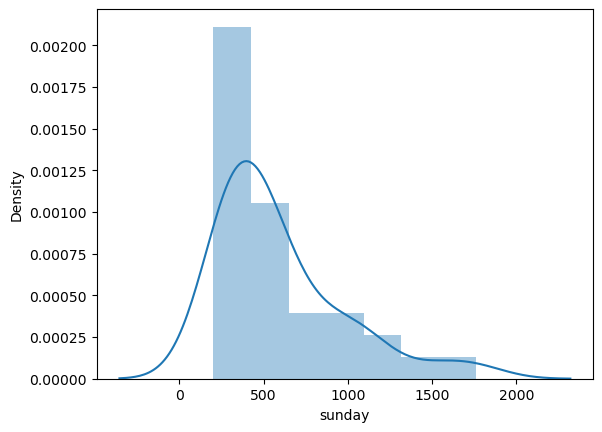

In [6]:
import seaborn as sns
sns.distplot(data['sunday'])

# 4. Fitting a Linear Regression Model

In [7]:
import statsmodels.formula.api as smf
model = smf.ols("sunday~daily",data = data).fit()

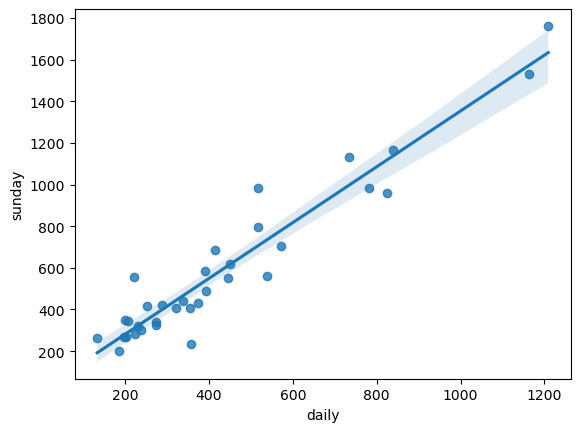

In [8]:
sns.regplot(x="daily", y="sunday", data=data);

# 5. Model parameters

In [5]:
#Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [34]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept     0.386427
daily        18.934840
dtype: float64 
   Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [9]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

# 6. Predict for new data point (testing phase)

In [14]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])
newdata

0    200
1    300
dtype: int64

In [16]:
data_pred=pd.DataFrame(newdata,columns=['daily'])
data_pred

,daily
0,200
1,300


In [17]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64